In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\paymo\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#loading the Dataset
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Shape of the data (number of rows and columns)
df.shape

(1460, 81)

In [4]:
#To know the data types and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

In [5]:
#Calculating the percentage of null values in the columns
pd.set_option('display.max_rows',100)
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

### Data Cleaning

#### Handling the Categorical Values

In [6]:
#First of all, let's drop the ID columns
df = df.drop(columns = ['Id'])

In [7]:
#Filling the null values according to the data description

df['MasVnrType'] = df['MasVnrType'].fillna('No Type')
df['Fence'] = df['Fence'].fillna('No Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['Alley'] = df['Alley'].fillna('No Alley Access')
df['PoolQC']  = df['PoolQC'].fillna('No Pool')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [8]:
#Filling in the Basment attributes

df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('No Basement')

In [9]:
#Filling in the Garage attributes

df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']].fillna('No Garage')

#### Handling the Numerical values

In [10]:
#LotFrontage is having 17% null values
#Let's first handle this
#According to data description it's the linear length of street connected to property
#So we can replace the mean value of feet of respective street type with null 

df.groupby('Street')['LotFrontage'].mean()

Street
Grvl    85.400000
Pave    69.985786
Name: LotFrontage, dtype: float64

In [11]:
#Separating the data for both the categories
grvl = df[df['Street']=='Grvl']
pave = df[df['Street'] == 'Pave']

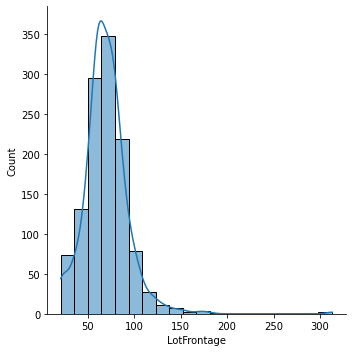

In [12]:
#Analyzing the spread of LotFrontage against pave street
sns.displot(pave['LotFrontage'], bins = 20, kde = True)

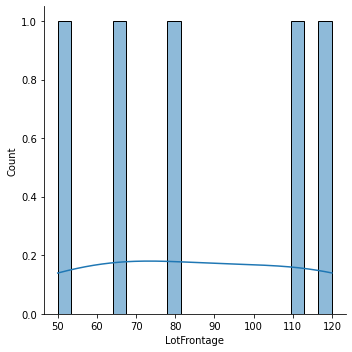

In [13]:
#Analyzing the spread of LotFrontage against grvl street
sns.displot(grvl['LotFrontage'], bins = 20, kde = True)

##### From the above diagram null values can be replaced with Median for there respective categories as the first graph doesn't show a normal curve and the second one has some gaps in the data.

In [14]:
#Getting the statistical summary for GRVL
grvl['LotFrontage'].describe()

count      5.000000
mean      85.400000
std       29.373457
min       50.000000
25%       66.000000
50%       81.000000
75%      110.000000
max      120.000000
Name: LotFrontage, dtype: float64

In [15]:
#Getting the statistical summary for pave
pave['LotFrontage'].describe()

count    1196.000000
mean       69.985786
std        24.255694
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
#Fillining the null values against Pave

df.loc[(df['Street'] == 'Pave') & (df['LotFrontage'].isna()), 'LotFrontage'] = 69

In [17]:
#Filling the null values against Grlv

df.loc[(df['Street'] == 'Grvl') & (df['LotFrontage'].isna()),'LotFrontage'] = 81

In [18]:
#Now we can drop the rows where Electrical and MasVnrArea values are null
#Since there are very few null values for those columns

df = df.dropna()

In [19]:
#Re verifying the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [20]:
# Calculating number of numerical and Categorical columns
categorical_cols = list(df.select_dtypes(include = ['object']).columns)
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [21]:
# Let's look at the numerical variables now

numerical_cols = list(df.select_dtypes(include = ['float64','int64']).columns)
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [22]:
#Let's capture all the columns which are having 95% as a single value
#Those columns are very biased towards a single value
#and we don't want such columns in our dataset

cat_single_valued = list()

for col in categorical_cols:
    per_value_counts = (df[col].value_counts()/df.shape[0]) >= 0.95
    if per_value_counts.sum() == 1:
        cat_single_valued.append(col)

print('Single valued Cateogorical cols\n',cat_single_valued)
categorical_cols = list(set(categorical_cols) - set(cat_single_valued))

num_single_valued = list()

for col in numerical_cols:
    per_value_counts = (df[col].value_counts()/df.shape[0]) >= 0.95
    if per_value_counts.sum() == 1:
        num_single_valued.append(col)

print('Single valued Numerical cols\n',num_single_valued)
numerical_cols = list(set(numerical_cols) - set(num_single_valued))
    

Single valued Cateogorical cols
 ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature']
Single valued Numerical cols
 ['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


In [23]:
#Let's check the length of each set of columns
print(len(numerical_cols))
print(len(categorical_cols))

31
37


In [24]:
df = pd.concat([df[categorical_cols], df[numerical_cols]],axis = 1)

In [25]:
df.head()

,HeatingQC,BldgType,LandContour,Condition1,Foundation,BsmtFinType2,LandSlope,MasVnrType,ExterQual,SaleType,...,Fireplaces,BedroomAbvGr,OpenPorchSF,1stFlrSF,ScreenPorch,SalePrice,MoSold,TotRmsAbvGrd,GrLivArea,BsmtFullBath
0,Ex,1Fam,Lvl,Norm,PConc,Unf,Gtl,BrkFace,Gd,WD,...,0,3,61,856,0,208500,2,8,1710,1
1,Ex,1Fam,Lvl,Feedr,CBlock,Unf,Gtl,No Type,TA,WD,...,1,3,0,1262,0,181500,5,6,1262,0
2,Ex,1Fam,Lvl,Norm,PConc,Unf,Gtl,BrkFace,Gd,WD,...,1,3,42,920,0,223500,9,6,1786,1
3,Gd,1Fam,Lvl,Norm,BrkTil,Unf,Gtl,No Type,TA,WD,...,1,3,35,961,0,140000,2,7,1717,1
4,Ex,1Fam,Lvl,Norm,PConc,Unf,Gtl,BrkFace,Gd,WD,...,1,4,84,1145,0,250000,12,9,2198,1


In [26]:
df.shape

(1451, 68)

### Data Visulaisation

<Axes: >

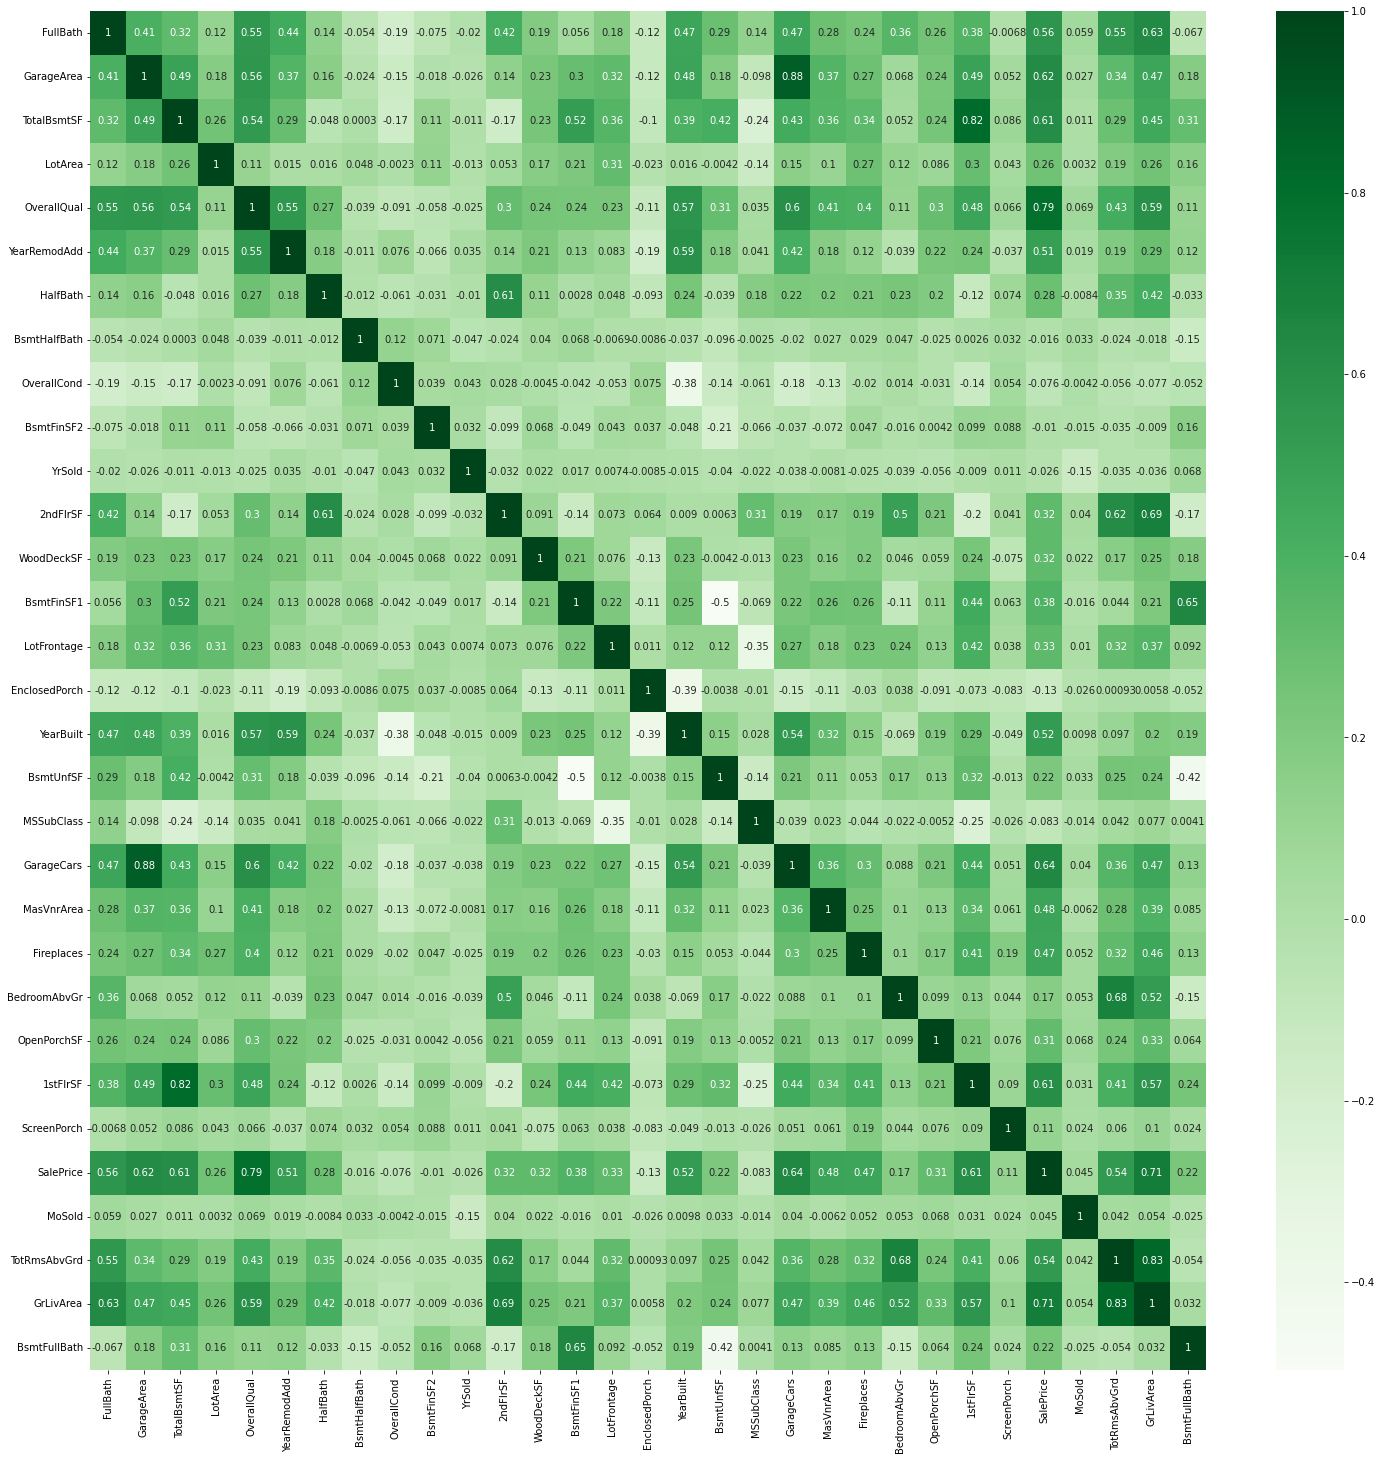

In [27]:
#Heatmap analysis
plt.figure(figsize = (25,25))

sns.heatmap(df[numerical_cols].corr(), annot = True, cmap= 'Greens')

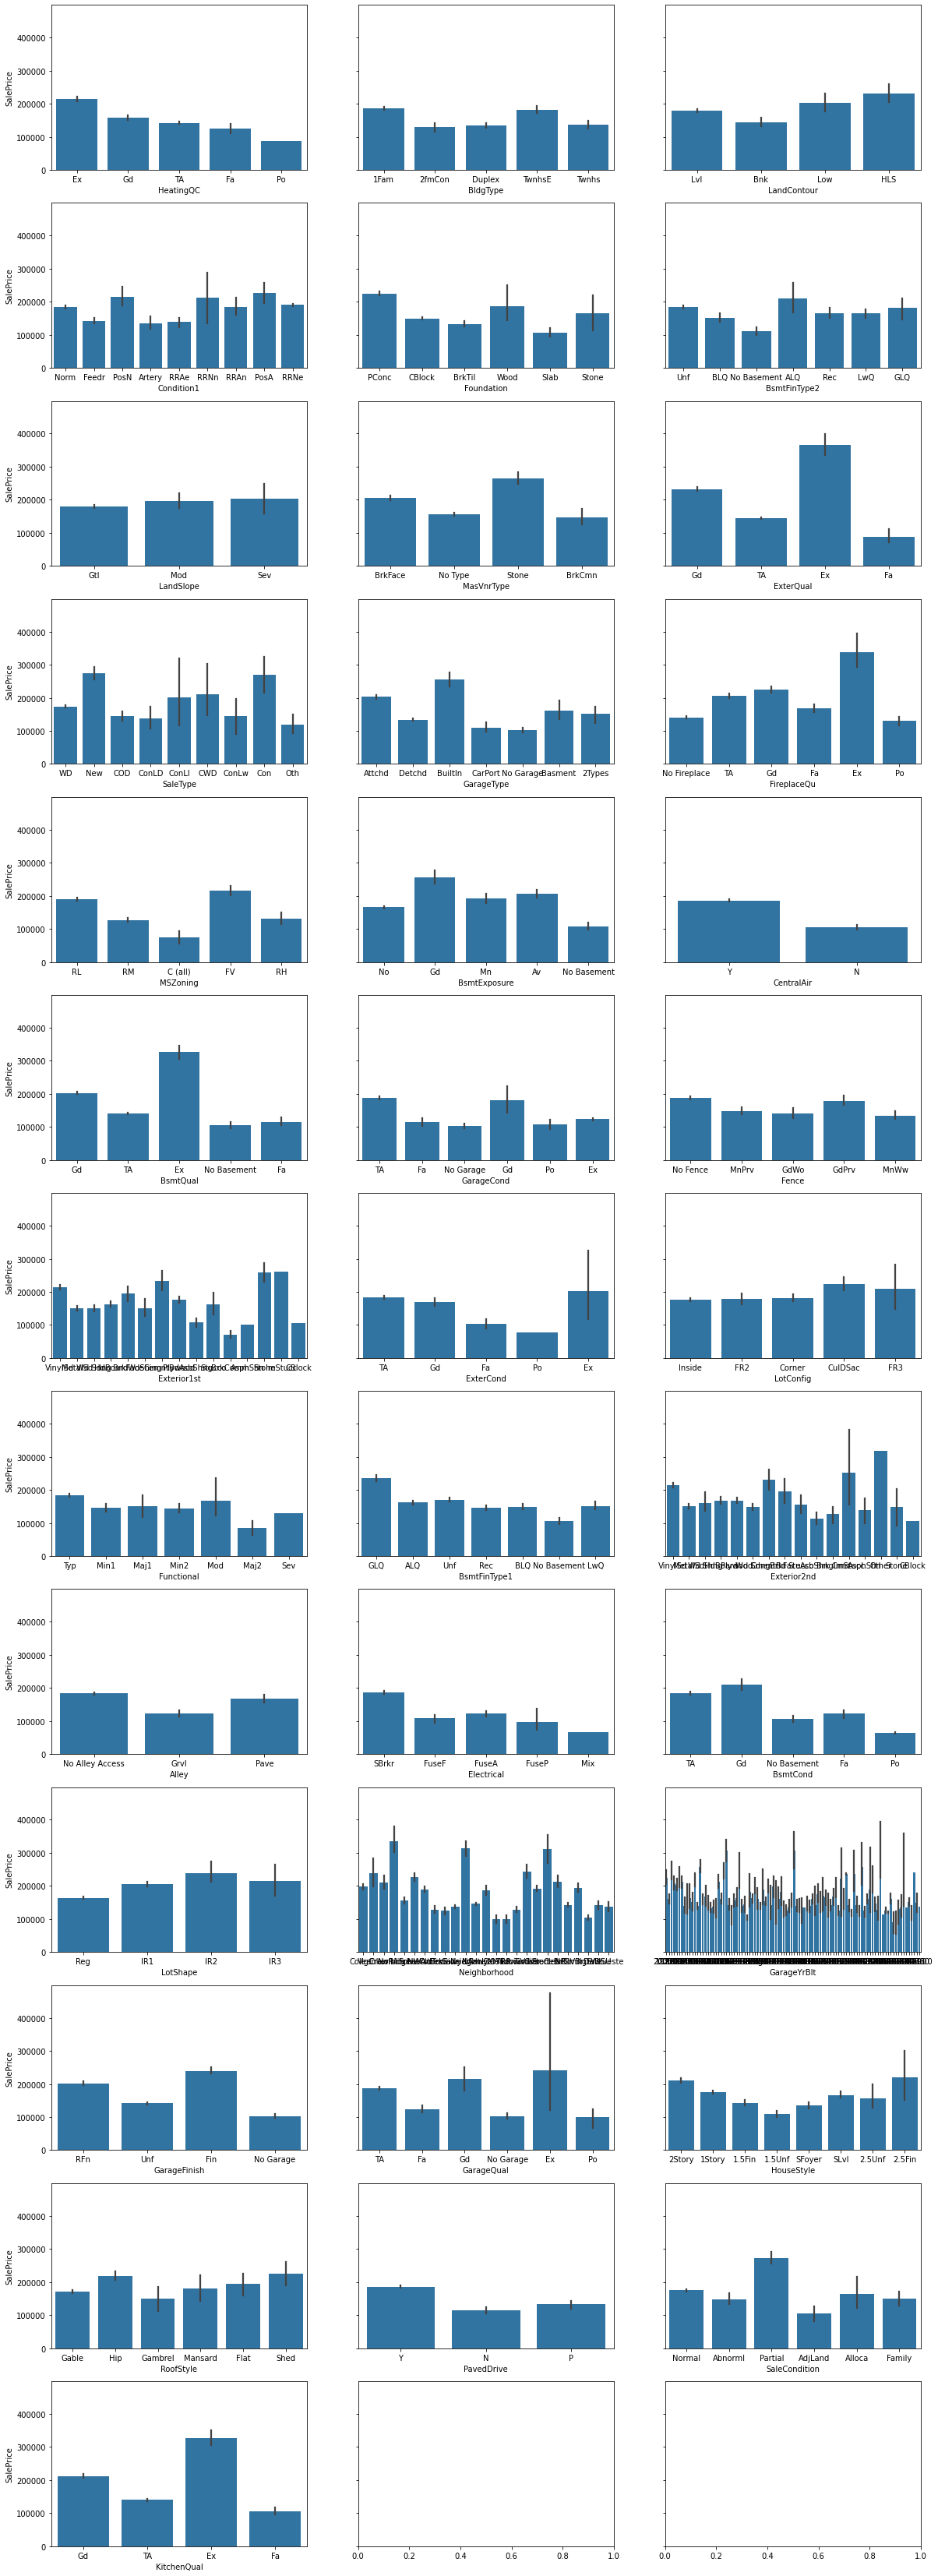

In [28]:
#Let's look at the relation between categorical variables and the SalePrice

fig, axes  = plt.subplots(nrows=13,ncols = 3, sharey = True, figsize = (20,60))

for i in range(13):
    for j in range(3):
        if i*3 + j < 37:
            sns.barplot(x = categorical_cols[i*3 + j], y = 'SalePrice', data = df, ax = axes[i][j])

In [29]:
#Let's analyse the mean of SalePrioce for all the values of GarageYrBlt
#To replace No Garage value wiht most appropriate one

dfGarYr = df.groupby('GarageYrBlt')['SalePrice'].mean().sort_values().reset_index()

In [30]:
dfGarYr.head()

,GarageYrBlt,SalePrice
0,1938.0,89850.000000
1,1952.0,101331.000000
2,No Garage,103317.283951
3,1920.0,109992.857143
4,1927.0,115000.000000


In [31]:
# Replacing the No Garage value with 0
df['GarageYrBlt'] = df['GarageYrBlt'].replace('No Garage', '1952.0')

In [32]:
# Transform the column to numerical
df['GarageYrBlt'] = df['GarageYrBlt'].astype('float')

In [33]:
categorical_cols.remove('GarageYrBlt')
numerical_cols.append('GarageYrBlt')

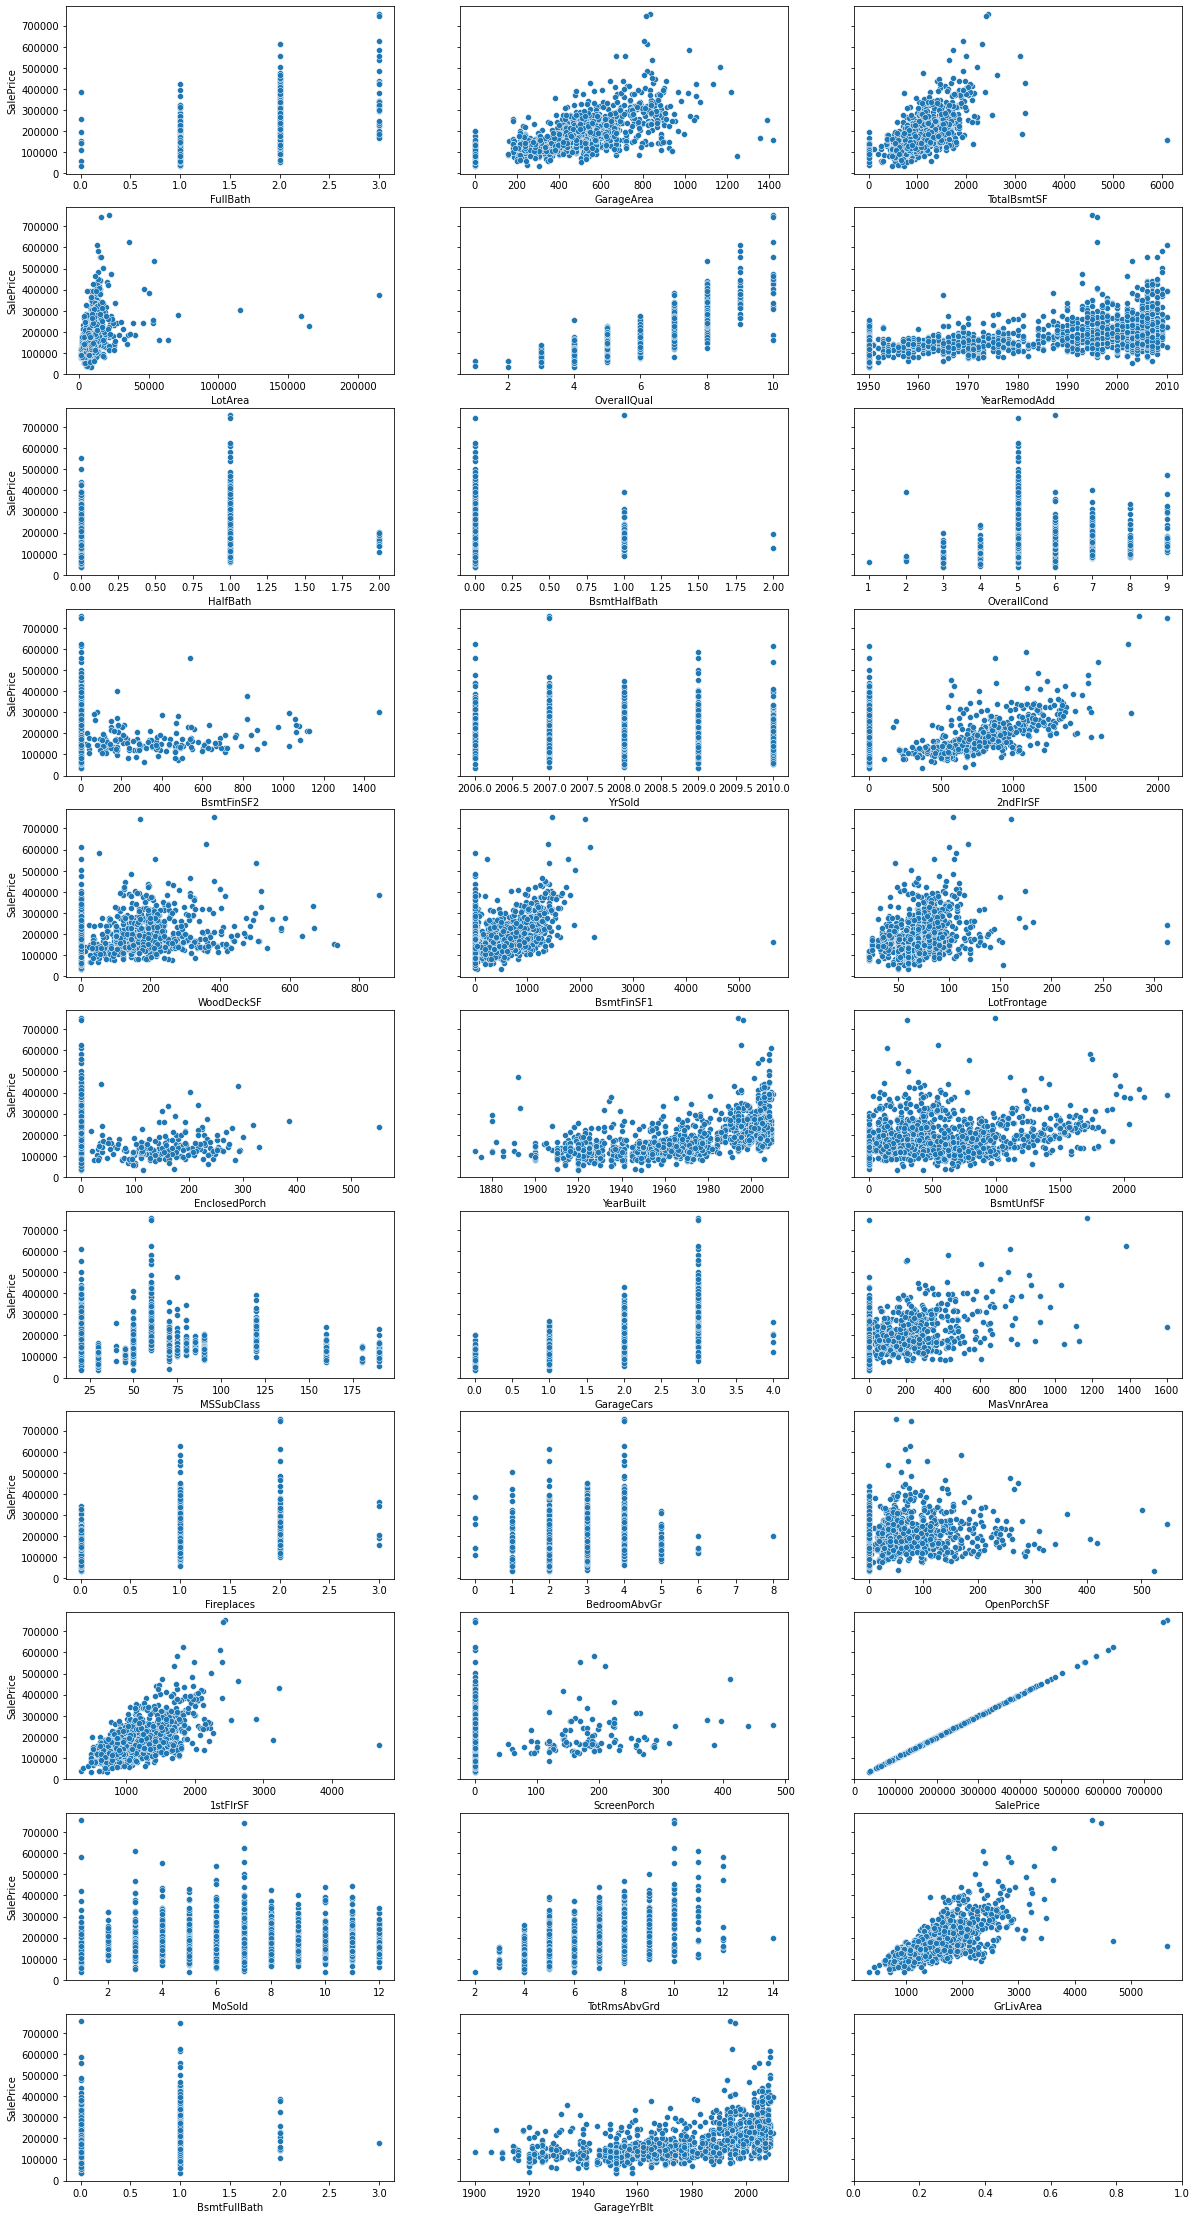

In [34]:
#Let's look at the relation between numerical variables and the SalePrice

fig, axes  = plt.subplots(nrows=11,ncols = 3, sharey = True, figsize = (20,40))

for i in range(11):
    for j in range(3):
        if i*3 + j < 32:
            sns.scatterplot(x = numerical_cols[i*3 + j], y = 'SalePrice', data = df, ax = axes[i][j])

### Categorical Variables Encoding

#### Ordinal Encoding

In [35]:
#Let's Orinally encode all the variable which are having a certain internal order or ranking

ordinal_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','GarageFinish','Fence']

len(ordinal_cols)


14

In [36]:
#Encoding the Exterior material Ordinal columns.

exterior_grades = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}

df['ExterQual'] = df['ExterQual'].map(exterior_grades)
df['ExterCond'] = df['ExterCond'].map(exterior_grades)


In [37]:
df[['ExterQual','ExterCond']].head()

,ExterQual,ExterCond
0,4,3
1,3,3
2,4,3
3,3,3
4,4,3


In [38]:
#Encoding Basement Condition and Basment Quality Ordinal columns
#We will assign -1 where there is no basement

bsmnt_grades = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':-1}

df['BsmtQual'] = df['BsmtQual'].map(bsmnt_grades)
df['BsmtCond'] = df['BsmtCond'].map(bsmnt_grades)

In [39]:
df[['BsmtQual','BsmtCond']].head()

,BsmtQual,BsmtCond
0,4,3
1,4,3
2,4,3
3,3,4
4,4,3


In [40]:
#Encoding the Basemnt Exposure column
#We will assign -1 where there is no basement

bsmnt_expo_grade = {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':-1}

df['BsmtExposure'] = df['BsmtExposure'].map(bsmnt_expo_grade)

In [41]:
df['BsmtExposure'].head()

0    1
1    4
2    2
3    1
4    3
Name: BsmtExposure, dtype: int64

In [42]:
#Encoding the Basemnt fininshing type columns
#We will assign -1 where there is no basement

bsmnt_fn_grade = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':-1}

df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmnt_fn_grade)
df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmnt_fn_grade)

In [43]:
df[['BsmtFinType1','BsmtFinType1']].head()

,BsmtFinType1,BsmtFinType1
0,6,6
1,5,5
2,6,6
3,5,5
4,6,6


In [44]:
#Encoding the Heating Quality and Kitchen Quality columns

Heating_Qul_grade = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}

df['HeatingQC'] = df['HeatingQC'].map(Heating_Qul_grade)

In [45]:
df['KitchenQual'] = df['KitchenQual'].map(Heating_Qul_grade)

In [46]:
df[['HeatingQC','KitchenQual']].head()

,HeatingQC,KitchenQual
0,5,4
1,5,3
2,5,4
3,4,4
4,5,4


In [47]:
#Encoding the Fireplace Quality column

fireplace_qu_grade = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace': -1}

df['FireplaceQu'] = df['FireplaceQu'].map(fireplace_qu_grade)

In [48]:
df[['FireplaceQu']].head()

,FireplaceQu
0,-1
1,3
2,3
3,4
4,3


In [49]:
##Encoding the Grage Quality and condition columns
#We will add -1 to the No Garage values

garage_qu_grade = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage': -1}

df['GarageQual'] = df['GarageQual'].map(garage_qu_grade)
df['GarageCond'] = df['GarageCond'].map(garage_qu_grade)

In [50]:
df[['GarageQual','GarageCond']].head()

,GarageQual,GarageCond
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3


In [51]:
##Encoding the Grage Finish column
#We will add -1 to the No Garage values

Garage_fin_grades = {'Fin':3,'RFn':2,'Unf':1,'No Garage':-1}

df['GarageFinish'] = df['GarageFinish'].map(Garage_fin_grades)

In [52]:
df[['GarageFinish']].head()

,GarageFinish
0,2
1,2
2,2
3,1
4,2


In [53]:
##Checking the remaining ordinal columns

ordinal_cols

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'GarageFinish',
 'Fence']

In [54]:
#Encoding the Fence column
#We will add -1 to No Fence values

fence_qual_grades = {'GdPrv':4,'MnPrv':3,'GdWo':2, 'MnWw':1, 'No Fence':-1}

df['Fence'] = df['Fence'].map(fence_qual_grades)

In [55]:
df[['Fence']].head()

,Fence
0,-1
1,-1
2,-1
3,-1
4,-1


#### Encoding the Categorical Columns

In [56]:
#Collecting the remaining categorical columns for encoding

categorical_cols = list(set(categorical_cols) - set(ordinal_cols))

In [57]:
df[categorical_cols].head()

,BldgType,LandContour,Condition1,Foundation,LandSlope,MasVnrType,SaleType,GarageType,MSZoning,CentralAir,...,Functional,Exterior2nd,Alley,Electrical,LotShape,Neighborhood,HouseStyle,RoofStyle,PavedDrive,SaleCondition
0,1Fam,Lvl,Norm,PConc,Gtl,BrkFace,WD,Attchd,RL,Y,...,Typ,VinylSd,No Alley Access,SBrkr,Reg,CollgCr,2Story,Gable,Y,Normal
1,1Fam,Lvl,Feedr,CBlock,Gtl,No Type,WD,Attchd,RL,Y,...,Typ,MetalSd,No Alley Access,SBrkr,Reg,Veenker,1Story,Gable,Y,Normal
2,1Fam,Lvl,Norm,PConc,Gtl,BrkFace,WD,Attchd,RL,Y,...,Typ,VinylSd,No Alley Access,SBrkr,IR1,CollgCr,2Story,Gable,Y,Normal
3,1Fam,Lvl,Norm,BrkTil,Gtl,No Type,WD,Detchd,RL,Y,...,Typ,Wd Shng,No Alley Access,SBrkr,IR1,Crawfor,2Story,Gable,Y,Abnorml
4,1Fam,Lvl,Norm,PConc,Gtl,BrkFace,WD,Attchd,RL,Y,...,Typ,VinylSd,No Alley Access,SBrkr,IR1,NoRidge,2Story,Gable,Y,Normal


### Splitting into Train and Test
We will do target encoding for the remaining categories.<br>
Separating the data before Encoding is important to overcome the data leakage into the test data.

In [58]:
#Separate independent and dependent variables
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

In [59]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initialize and fit the target encoder
encoder = ce.TargetEncoder(cols= categorical_cols)
encoder.fit(X_train[categorical_cols], y_train)

# Transform both training and testing sets
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

In [60]:
#Replacing the Categorical Data with encoded

X_train[categorical_cols] = X_train_encoded[categorical_cols]
X_test[categorical_cols] = X_test_encoded[categorical_cols]

In [61]:
X_train.head()

,HeatingQC,BldgType,LandContour,Condition1,Foundation,BsmtFinType2,LandSlope,MasVnrType,ExterQual,SaleType,...,MasVnrArea,Fireplaces,BedroomAbvGr,OpenPorchSF,1stFlrSF,ScreenPorch,MoSold,TotRmsAbvGrd,GrLivArea,BsmtFullBath
713,3,150786.982188,180748.906491,180240.550345,150346.479638,1,180203.920751,202311.892508,3,173037.935006,...,160.0,0,3,288,960,0,5,6,960,1
623,5,187219.679522,180748.906491,185153.019608,226543.856180,1,180203.920751,202311.892508,4,173037.935006,...,513.0,1,2,32,756,0,6,4,1512,0
592,5,186301.563830,180748.906491,185153.019608,226543.856180,1,180203.920751,158457.251232,3,173037.935006,...,0.0,0,2,0,816,0,6,4,816,1
631,5,145162.861318,180748.906491,185153.019608,226543.856180,1,180203.920751,268085.391354,4,173037.935006,...,108.0,1,2,73,1554,0,8,6,1554,0
158,5,186301.563830,180748.906491,185153.019608,226543.856180,1,180203.920751,158457.251232,4,173037.935006,...,0.0,1,3,136,991,0,5,8,1947,0


In [62]:
X_test[categorical_cols].head()

,BldgType,LandContour,Condition1,Foundation,LandSlope,MasVnrType,SaleType,GarageType,MSZoning,CentralAir,...,Functional,Exterior2nd,Alley,Electrical,LotShape,Neighborhood,HouseStyle,RoofStyle,PavedDrive,SaleCondition
540,186301.56383,180748.906491,185153.019608,226543.856180,180203.920751,202311.892508,173037.935006,202168.951747,191695.756892,186680.006322,...,184338.486716,215636.376093,184418.084388,187607.794816,163241.457813,209584.568472,174970.688259,221304.719992,187220.845739,174756.513906
757,186301.56383,180748.906491,185153.019608,150346.479638,180203.920751,174433.485417,173037.935006,202168.951747,191695.756892,186680.006322,...,184338.486716,167104.938632,184418.084388,187607.794816,210016.706231,140640.864841,210691.196319,221304.719992,187220.845739,147640.187455
49,186301.56383,180748.906491,185153.019608,150346.479638,180203.920751,158457.251232,173037.935006,202168.951747,191695.756892,186680.006322,...,184338.486716,167104.938632,184418.084388,187607.794816,163241.457813,140640.864841,174970.688259,171620.627525,187220.845739,174756.513906
1456,186301.56383,180748.906491,185153.019608,150346.479638,180203.920751,268085.391354,173037.935006,202168.951747,191695.756892,186680.006322,...,160059.224903,171671.340142,184418.084388,187607.794816,163241.457813,190452.055894,174970.688259,171620.627525,187220.845739,174756.513906
141,186301.56383,180748.906491,185153.019608,226543.856180,180203.920751,158457.251232,173037.935006,202168.951747,191695.756892,186680.006322,...,184338.486716,215636.376093,184418.084388,187607.794816,163241.457813,203606.637274,174970.688259,171620.627525,187220.845739,174756.513906


#### Applying min max scalling

In [63]:

# Fit the scaler on the training data for independent variables
scaler_ind = MinMaxScaler()
scaler_ind.fit(X_train)

# Transform the training and testing data
X_train = scaler_ind.transform(X_train)
X_test = scaler_ind.transform(X_test)

#Fit the scaler on the training data for target variale
scaler_dep = MinMaxScaler()
scaler_dep.fit(pd.DataFrame(y_train))

# Transform the training and testing data
y_train = scaler_dep.transform(pd.DataFrame(y_train))
y_test = scaler_dep.transform(pd.DataFrame(y_test))

### Ridge Regression

In [64]:
lambda_range = np.logspace(-4, 2, 10)  # Example: Explore 6 values on a log scale
param_grid = {'alpha': lambda_range}  # alpha is the hyperparameter for both Ridge and Lasso


In [65]:
model = Ridge() 
# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring= 'r2' )  # Maximize R2 Score

# Train the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02])},
             scoring='r2')

In [66]:
#Extracting the best model according to mean R2 score value 5 splits.

best_model_ridge = grid_search.best_estimator_
best_lambda_ridge = grid_search.best_params_['alpha']

In [67]:
print('THE BEST LAMBDA VALUE FOR LASSO REGRESSION IS- ',best_lambda_ridge)
print('THE NUMBER OF VARIABLES CHOSEN ARE-',np.count_nonzero(best_model_ridge.coef_))

THE BEST LAMBDA VALUE FOR LASSO REGRESSION IS-  4.641588833612772
THE NUMBER OF VARIABLES CHOSEN ARE- 67


In [68]:
#Training the model on the value of lambda

ridgereg = Ridge(alpha = 4.64)

ridgereg.fit(X_train, y_train) # fit the model 
# print(ridgereg.coef_)    
y_pred = ridgereg.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_pred)))


r2 score = 0.852091317504326


In [69]:
#now checking the r2 score for the test data

y_pred_test = ridgereg.predict(X_test)
print("r2 score test = " + str(r2_score(y_test, y_pred_test))) 

r2 score test = 0.848976975274087


In [70]:
#Coeficients of the variables for ridge regression
cols = list(df.columns)
cols.remove('SalePrice')

ridge_coef = pd.DataFrame({'Variables':list(cols), 'Coef':list(best_model_ridge.coef_.flatten())})

In [71]:
#Function to ignore sign of the values while soriting
def ignore_sign(x):
  """Sorts based on magnitude, ignoring sign."""
  return abs(x)

In [72]:
#Looking at the top 10 significant variables
ridge_coef.sort_values(by = 'Coef', ascending = False, key=ignore_sign).head(10)

,Variables,Coef
41,OverallQual,0.097479
65,GrLivArea,0.096355
61,1stFlrSF,0.084198
28,Neighborhood,0.074647
48,2ndFlrSF,0.059822
64,TotRmsAbvGrd,0.054868
56,GarageCars,0.050165
55,MSSubClass,-0.045940
8,ExterQual,0.045780
36,KitchenQual,0.043901


### Lasso Regression

In [73]:
lambda_range = np.logspace(-4, 2, 10)  # Example: Explore 6 values on a log scale
param_grid = {'alpha': lambda_range}  # alpha is the hyperparameter for both Ridge and Lasso


In [74]:
model = Lasso() 
# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring= 'r2' )  # Maximize R2 Score

# Train the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02])},
             scoring='r2')

In [75]:
#Extracting the best model according to mean R2 score value 5 splits.

best_model_lasso = grid_search.best_estimator_
best_lambda_lasso = grid_search.best_params_['alpha']

In [76]:
#Checking the number of selected variables and
#The best lambda value

print('THE BEST LAMBDA VALUE FOR LASSO REGRESSION IS- ',best_lambda_lasso)
print('THE NUMBER OF VARIABLES CHOSEN ARE-',np.count_nonzero(best_model_lasso.coef_))

THE BEST LAMBDA VALUE FOR LASSO REGRESSION IS-  0.00046415888336127773
THE NUMBER OF VARIABLES CHOSEN ARE- 29


In [77]:
#Training the model on best lambda
lassoreg = Lasso(alpha = 0.00046)
lassoreg.fit(X_train, y_train)
# print(lassoreg.coef_)
y_pred = lassoreg.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_pred)))

r2 score = 0.8449096961355597


In [78]:
#now checking the r2 score for the test data

y_pred_test = lassoreg.predict(X_test)
print("r2 score test = " + str(r2_score(y_test, y_pred_test))) 

r2 score test = 0.843784994572117


In [79]:
#Coeficients of the variables for ridge regression
cols = list(df.columns)
cols.remove('SalePrice')

lasso_coef = pd.DataFrame({'Variables':list(cols), 'Coef':list(best_model_lasso.coef_.flatten())})

In [80]:
#Looking at the top 10 significant variables
lasso_coef.sort_values(by = 'Coef', ascending = False, key=ignore_sign).head(10)

,Variables,Coef
65,GrLivArea,0.350866
41,OverallQual,0.116869
28,Neighborhood,0.084826
36,KitchenQual,0.045730
13,BsmtExposure,0.044045
55,MSSubClass,-0.043769
56,GarageCars,0.042863
8,ExterQual,0.038353
57,MasVnrArea,0.024858
9,SaleType,0.023681


<b> Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [81]:
#For the lasso regression
#The top 5 significant variabled are 

print('The Best lambda value for ridge-',best_lambda_ridge)
ridge_coef.sort_values(by = 'Coef', ascending = False, key=ignore_sign).head(5)

The Best lambda value for ridge- 4.641588833612772


,Variables,Coef
41,OverallQual,0.097479
65,GrLivArea,0.096355
61,1stFlrSF,0.084198
28,Neighborhood,0.074647
48,2ndFlrSF,0.059822


In [82]:
#From the lasso regression
#The top 5 significant variabled are 

print('The Best lambda value for lasso-',best_lambda_lasso)
lasso_coef.sort_values(by = 'Coef', ascending = False, key=ignore_sign).head(5)

The Best lambda value for lasso- 0.00046415888336127773


,Variables,Coef
65,GrLivArea,0.350866
41,OverallQual,0.116869
28,Neighborhood,0.084826
36,KitchenQual,0.045730
13,BsmtExposure,0.044045


In [83]:
# Ridge Regression

ridgereg = Ridge(alpha = 9.28) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_train, y_train) # fit the model on the polynomial features
# print(ridgereg.coef_)    
y_pred = ridgereg.predict(X_train)
print("r2 score train ridge= " + str(r2_score(y_train, y_pred)))

# Lasso Regression

lassoreg = Lasso(alpha = 0.0008)
lassoreg.fit(X_train, y_train)
# print(lassoreg.coef_)
y_pred = lassoreg.predict(X_train)
print("r2 score train lasso = " + str(r2_score(y_train, y_pred)))


r2 score train ridge= 0.8444540977616695
r2 score train lasso = 0.8325615396348495


In [84]:
#Test R2 scores for the models
y_pred_test = ridgereg.predict(X_test)
print("r2 score test ridge= " + str(r2_score(y_test, y_pred_test))) 

y_pred_test = lassoreg.predict(X_test)
print("r2 score test for lasso = " + str(r2_score(y_test, y_pred_test))) 

r2 score test ridge= 0.8451953451508774
r2 score test for lasso = 0.836442868529243


In [85]:
#Coeficients of the variables for Lasso regression
cols = list(df.columns)
cols.remove('SalePrice')

ridge_coef = pd.DataFrame({'Variables':list(cols), 'Coef':list(ridgereg.coef_.flatten())})

#For the lasso regression
#The top 5 significant variabled are 
ridge_coef.sort_values(by = 'Coef', ascending = False, key=ignore_sign).head(5)

,Variables,Coef
41,OverallQual,0.081679
65,GrLivArea,0.075239
28,Neighborhood,0.070844
61,1stFlrSF,0.063583
48,2ndFlrSF,0.053112


In [86]:
#Coeficients of the variables for Lasso regression
cols = list(df.columns)
cols.remove('SalePrice')

lasso_coef = pd.DataFrame({'Variables':list(cols), 'Coef':list(lassoreg.coef_.flatten())})

#For the lasso regression
#The top 5 significant variabled are 
lasso_coef.sort_values(by = 'Coef', ascending = False, key=ignore_sign).head(5)

,Variables,Coef
65,GrLivArea,0.312140
41,OverallQual,0.116463
28,Neighborhood,0.088628
36,KitchenQual,0.050828
13,BsmtExposure,0.044905


<b>Q3. After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now? 

#### Removing the top 5 Significant variables and retraining the lasso model

In [87]:
cols = list(df.columns)
cols = [col for col in cols if col not in ['GrLivArea','OverallQual','Neighborhood','KitchenQual','BsmtExposure']]

In [88]:
new_df = df[cols]

In [89]:
categorical_cols = [col for col in categorical_cols if col not in ['GrLivArea','OverallQual','Neighborhood','KitchenQual','BsmtExposure']]

In [90]:
#Separate independent and dependent variables
X = new_df.drop(columns = 'SalePrice')
y = new_df['SalePrice']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initialize and fit the target encoder
encoder = ce.TargetEncoder(cols= categorical_cols)
encoder.fit(X_train[categorical_cols], y_train)

# Transform both training and testing sets
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

#Replacing the Categorical Data with encoded

X_train[categorical_cols] = X_train_encoded[categorical_cols]
X_test[categorical_cols] = X_test_encoded[categorical_cols]


# Fit the scaler on the training data for independent variables
scaler_ind = MinMaxScaler()
scaler_ind.fit(X_train)

# Transform the training and testing data
X_train = scaler_ind.transform(X_train)
X_test = scaler_ind.transform(X_test)

#Fit the scaler on the training data for target variale
scaler_dep = MinMaxScaler()
scaler_dep.fit(pd.DataFrame(y_train))

# Transform the training and testing data
y_train = scaler_dep.transform(pd.DataFrame(y_train))
y_test = scaler_dep.transform(pd.DataFrame(y_test))



In [91]:
#Lasso Regression
lambda_range = np.logspace(-4, 2, 10)  # Example: Explore 6 values on a log scale
param_grid = {'alpha': lambda_range}  # alpha is the hyperparameter for both Ridge and Lasso


In [92]:
# Choose the model (Ridge or Lasso)
model = Lasso() 
# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring= 'r2' )  # Maximize R2 Score

# Train the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02])},
             scoring='r2')

In [93]:
#Extracting the best model according to mean R2 score value 5 splits.

best_model = grid_search.best_estimator_
best_lambda = grid_search.best_params_['alpha']

In [94]:
#Checking the number of selected variables and
#The best lambda value

print('THE BEST LAMBDA VALUE FOR LASSO REGRESSION IS- ',best_lambda)
print('THE NUMBER OF VARIABLES CHOSEN ARE-',np.count_nonzero(best_model.coef_))

THE BEST LAMBDA VALUE FOR LASSO REGRESSION IS-  0.00046415888336127773
THE NUMBER OF VARIABLES CHOSEN ARE- 32


In [95]:
#Training the model on best lambda
lassoreg = Lasso(alpha = 0.00046)
lassoreg.fit(X_train, y_train)
# print(lassoreg.coef_)
y_pred = lassoreg.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_pred)))

r2 score = 0.8105647743280214


In [96]:
#now checking the r2 score for the test data

y_pred_test = lassoreg.predict(X_test)
print("r2 score test = " + str(r2_score(y_test, y_pred_test))) 

r2 score test = 0.7964568645612766


In [97]:
#Coeficients of the variables for ridge regression
cols = list(new_df.columns)
cols.remove('SalePrice')

lasso_coef = pd.DataFrame({'Variables':list(cols), 'Coef':list(best_model.coef_.flatten())})

In [98]:
#From the lasso regression
#The top 5 significant variabled are 

lasso_coef.sort_values(by = 'Coef', ascending = False, key=ignore_sign).head(5)

,Variables,Coef
57,1stFlrSF,0.330100
44,2ndFlrSF,0.131794
8,ExterQual,0.106951
52,GarageCars,0.075457
53,MasVnrArea,0.061606
